In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as ss
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('HR.csv')
df=df.dropna(axis=0,how='any')
df=df[df.last_evaluation<=1][df.salary!='nme'][df.department!='sale']

C:\Users\ni\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
dp_indices=df.groupby('department').indices

In [19]:
sales_values = df['left'].iloc[dp_indices['sales']].values
technical_values = df['left'].iloc[dp_indices['technical']].values
ss.ttest_ind(sales_values,technical_values)


Ttest_indResult(statistic=-1.0601649378624074, pvalue=0.2891069046174478)

<function matplotlib.pyplot.show(*args, **kw)>

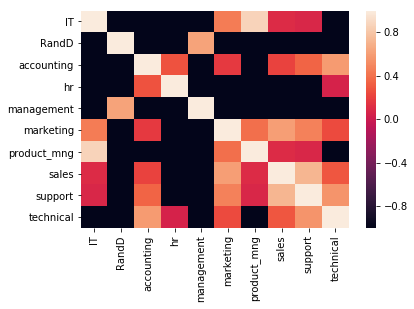

In [40]:
dp_keys = list(dp_indices.keys())

dp_t_mat = np.zeros([len(dp_keys),len(dp_keys)])
for i in range(len(dp_keys)):
    for j in range(len(dp_keys)):
        p = ss.ttest_ind(df['left'].iloc[dp_indices[dp_keys[i]]],df['left'].iloc[dp_indices[dp_keys[j]]])[1]
        if p<0.05:
            dp_t_mat[i][j]=-1
        else:
            dp_t_mat[i][j]=p
sns.heatmap(dp_t_mat,xticklabels=dp_keys,yticklabels=dp_keys)
plt.show

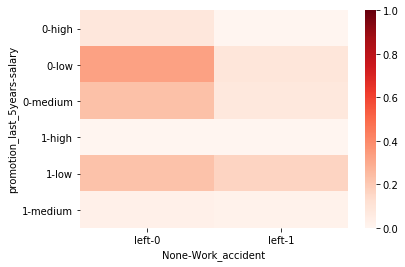

In [54]:
piv_table=pd.pivot_table(df,values=['left'],index=['promotion_last_5years','salary'],columns=['Work_accident'],aggfunc=np.mean)
sns.set_context(font_scale=2)
sns.heatmap(piv_table,vmin=0,vmax=1,cmap=sns.color_palette("Reds", n_colors=512))

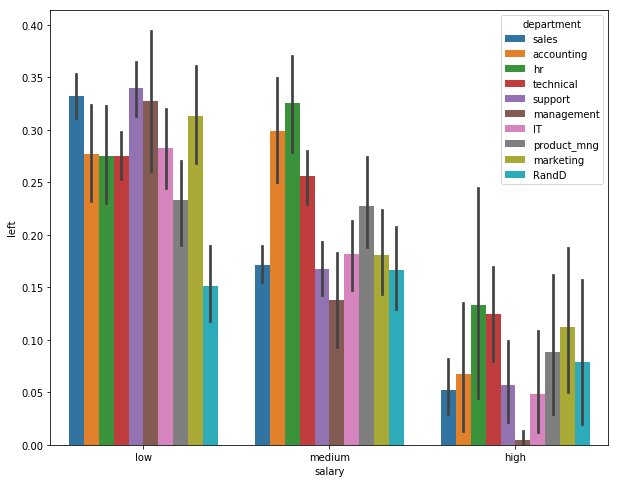

In [6]:
plt.figure(figsize=(10,8))
sns.barplot(x='salary',y='left',hue='department',data=df)

In [13]:
sl_s=df['satisfaction_level']

In [21]:
sl_s.sort_values()

14484    0.09
1873     0.09
340      0.09
1882     0.09
332      0.09
12765    0.09
12761    0.09
350      0.09
761      0.09
14489    0.09
765      0.09
1211     0.09
1076     0.09
278      0.09
1927     0.09
1386     0.09
1214     0.09
359      0.09
12044    0.09
14339    0.09
12477    0.09
407      0.09
14351    0.09
1053     0.09
729      0.09
1054     0.09
397      0.09
1834     0.09
14397    0.09
14401    0.09
         ... 
9313     1.00
6103     1.00
11329    1.00
3016     1.00
7863     1.00
9201     1.00
6939     1.00
7173     1.00
13007    1.00
9923     1.00
3161     1.00
11206    1.00
9838     1.00
9815     1.00
2023     1.00
6327     1.00
9769     1.00
2193     1.00
6306     1.00
6247     1.00
4444     1.00
7597     1.00
12902    1.00
9611     1.00
7612     1.00
12916    1.00
4553     1.00
4555     1.00
11122    1.00
4724     1.00
Name: satisfaction_level, Length: 14999, dtype: float64

In [23]:
list(range(len(sl_s)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


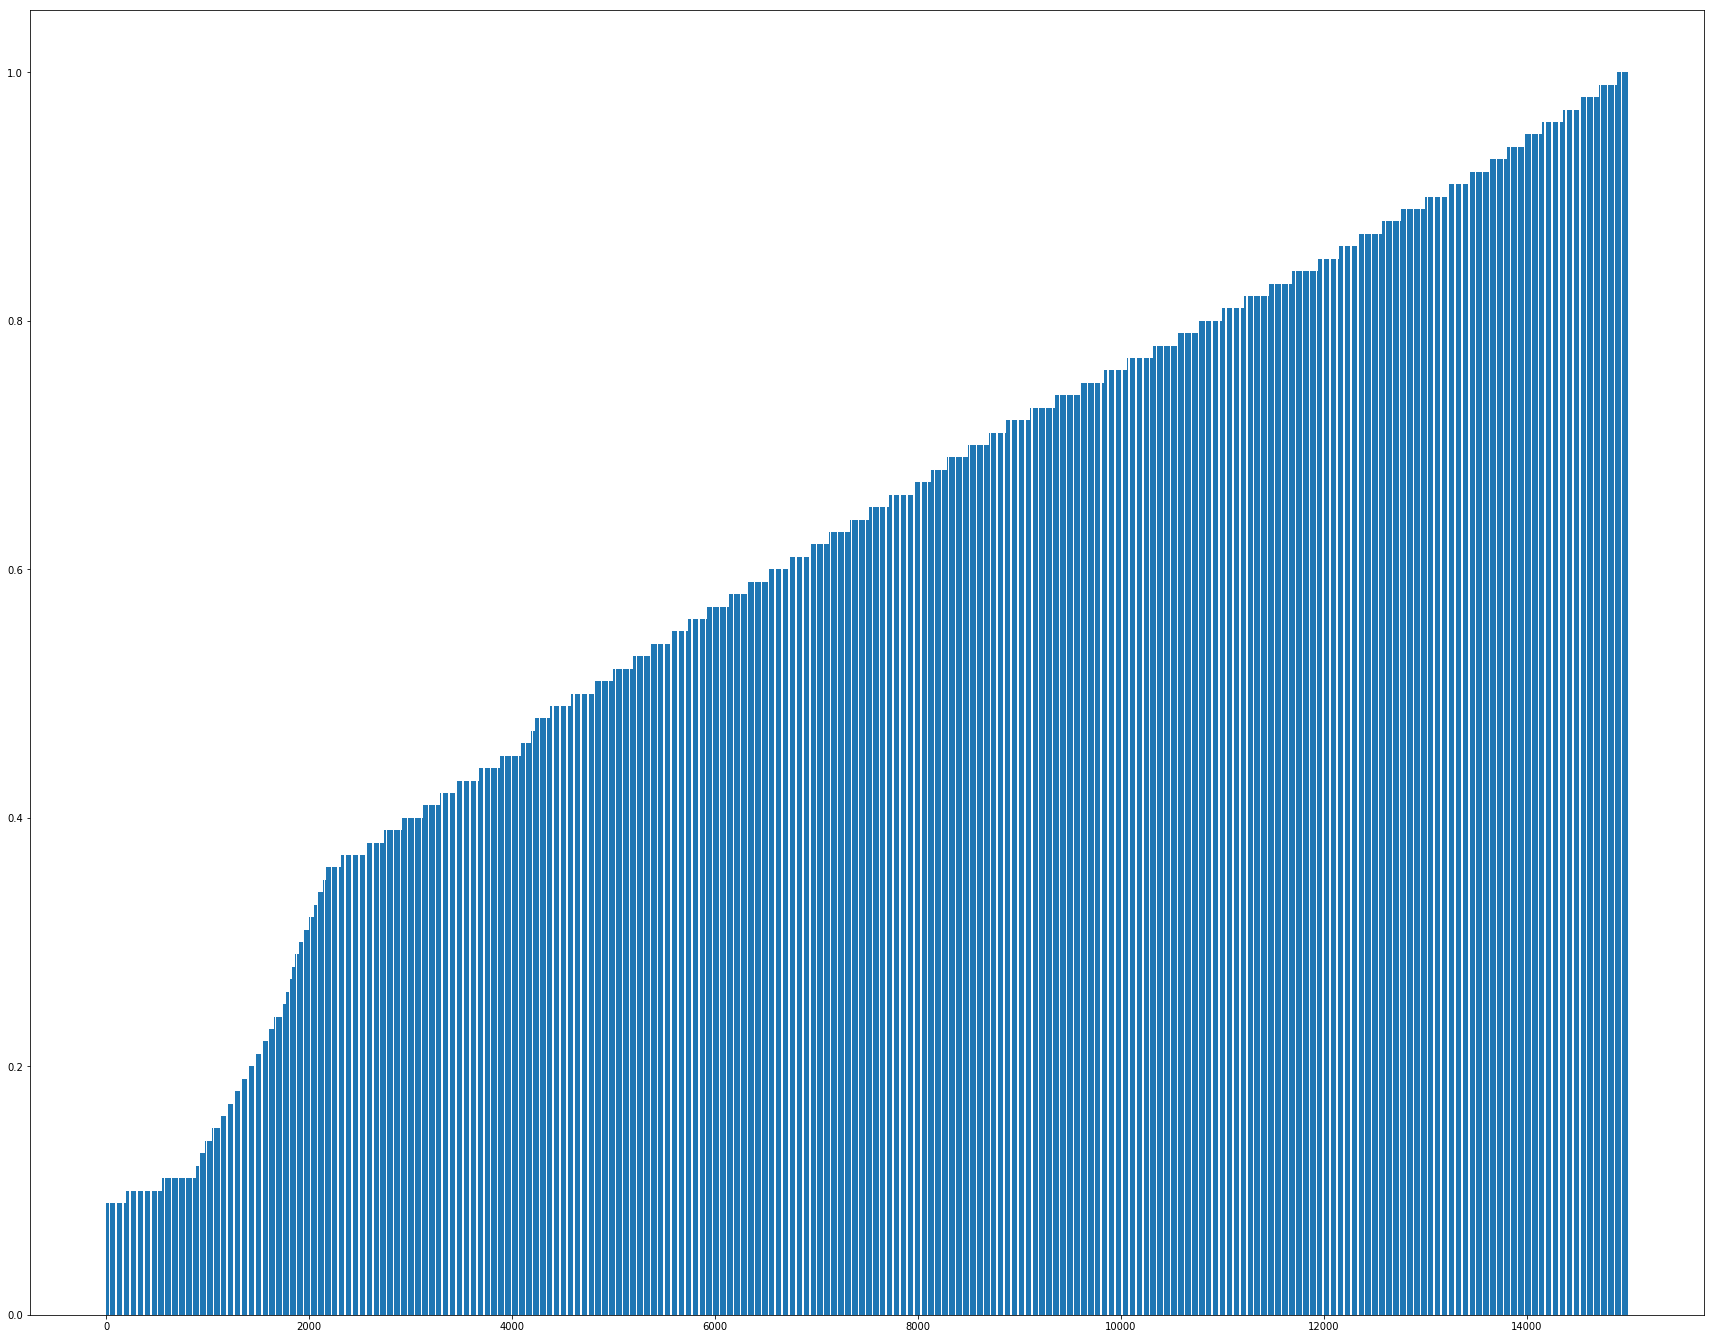

In [27]:
plt.figure(figsize=(30,24))
#sns.barplot(x=list(range(len(sl_s))),y=sl_s.sort_values())
plt.bar(x=list(range(len(sl_s))),height=sl_s.sort_values())
plt.show()

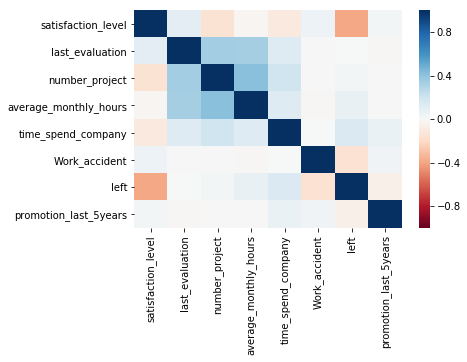

In [30]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=256))

In [32]:
s1=pd.Series(['X1','X1','X2','X2','X2','X2'])
s2=pd.Series(['Y1','Y1','Y1','Y2','Y2','Y2'])

In [80]:
type(s1)

pandas.core.series.Series

In [83]:
def getEntropy(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s)
    prt_ary =s.groupby(by=s).count().values/float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()

In [85]:
getEntropy(s1)

0.9182958340544896

In [91]:
def getCondEntropy(s1,s2):
    d=dict()
    for i in list(range(len(s1))):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    return sum([getEntropy(d[k])*len(d[k])/float(len(s1)) for k in d ])

In [117]:
getCondEntropy(s1,s2)

0.5408520829727552

In [95]:
def getEntropyGain(s1,s2):
    return getEntropy(s1)-getCondEntropy(s2,s1)

In [97]:
getEntropyGain(s2,s1)

0.4591479170272448

In [101]:
def getEntropyGainRatio(s1,s2):
    return getEntropyGain(s1,s2)/getEntropy(s2)

In [103]:
getEntropyGainRatio(s2,s1)

0.5

In [106]:
def getDistCorr(s1,s2):
    import math 
    return getEntropyGain(s1,s2)/math.sqrt(getEntropy(s1)*getEntropy(s2))
    

In [115]:
getDistCorr(s1,s2)

0.4791387674918639

In [109]:
def getProbSS(s):
    if not isinstance(s,pd.core.series.Series):
        s=pd.Series(s)
    prt_ary =s.groupby(by=s).count().values/float(len(s))
    return sum(prt_ary**2)

In [111]:
def getGini(s1,s2):
    d=dict()
    for i in list(range(len(s1))):
        d[s1[i]]=d.get(s1[i],[])+[s2[i]]
    return 1-sum([getProbSS(d[k])*len(d[k])/float(len(s1)) for k in d ])

In [114]:
getGini(s1,s2)

0.25

In [122]:
my_pca=PCA(n_components=7)
lower_mat=my_pca.fit_transform(df.drop(labels=['salary','department','left'],axis=1))
my_pca.explained_variance_ratio_

array([9.98565340e-01, 8.69246970e-04, 4.73865973e-04, 4.96932182e-05,
       2.43172315e-05, 9.29496619e-06, 8.24128218e-06])

In [123]:
lower_mat

array([[-4.40682814e+01, -6.85590899e-01,  1.20311482e+00, ...,
         2.82386023e-01,  3.55935813e-02, -1.86478694e-02],
       [ 6.09678054e+01,  2.33866530e+00,  7.74501547e-02, ...,
        -2.54640098e-01, -1.45126716e-03, -3.89674130e-02],
       [ 7.09804156e+01,  9.11031234e-01, -2.32102014e+00, ...,
         3.97179480e-01, -6.55540542e-02,  5.48764427e-03],
       ...,
       [-5.80674300e+01, -5.95449610e-01,  1.07801005e+00, ...,
         2.86439309e-01,  2.37992502e-02, -1.68581374e-02],
       [ 7.89697212e+01,  5.88409043e-01, -1.29117353e+00, ...,
         4.11515193e-01, -1.76298342e-01,  2.13644348e-02],
       [-4.30683528e+01, -6.91952453e-01,  1.21207711e+00, ...,
         2.94340839e-01,  4.43804824e-02, -1.97552251e-02]])

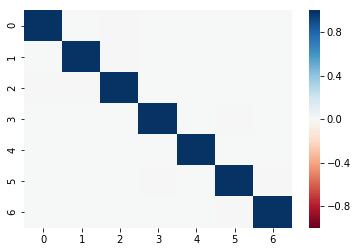

In [124]:
sns.heatmap(pd.DataFrame(lower_mat).corr(),vmax=1,vmin=-1,cmap=sns.color_palette('RdBu',n_colors=128))

In [66]:
a={'x2':2,'x3':3,'x4':4,'x1':1}
b=[1,2,3]
c=[4,5,6]
d=np.array(b)
d+2

array([3, 4, 5])

In [63]:
for k in a:
    print(a.get(k,[]))

2
3
4
1
